Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [2]:
med_table = mpg  %>% 
    group_by(class)  %>% 
    summarise(med_cty = median(cty))  %>% 
    arrange(med_cty)  %>% 
    mutate(class = fct_inorder(class))  

#Can also do:
med_table1 = mpg  %>% 
    group_by(class)  %>% 
    summarise(med_cty = median(cty))  %>% 
    mutate(class = fct_reorder(class, med_cty, max))
#these are the same, but when you print the reorder is hidden until you plot the data

med_table
med_table1

class,med_cty
<fct>,<dbl>
pickup,13
suv,13
2seater,15
minivan,16
midsize,18
subcompact,19
compact,20


class,med_cty
<fct>,<dbl>
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19
suv,13


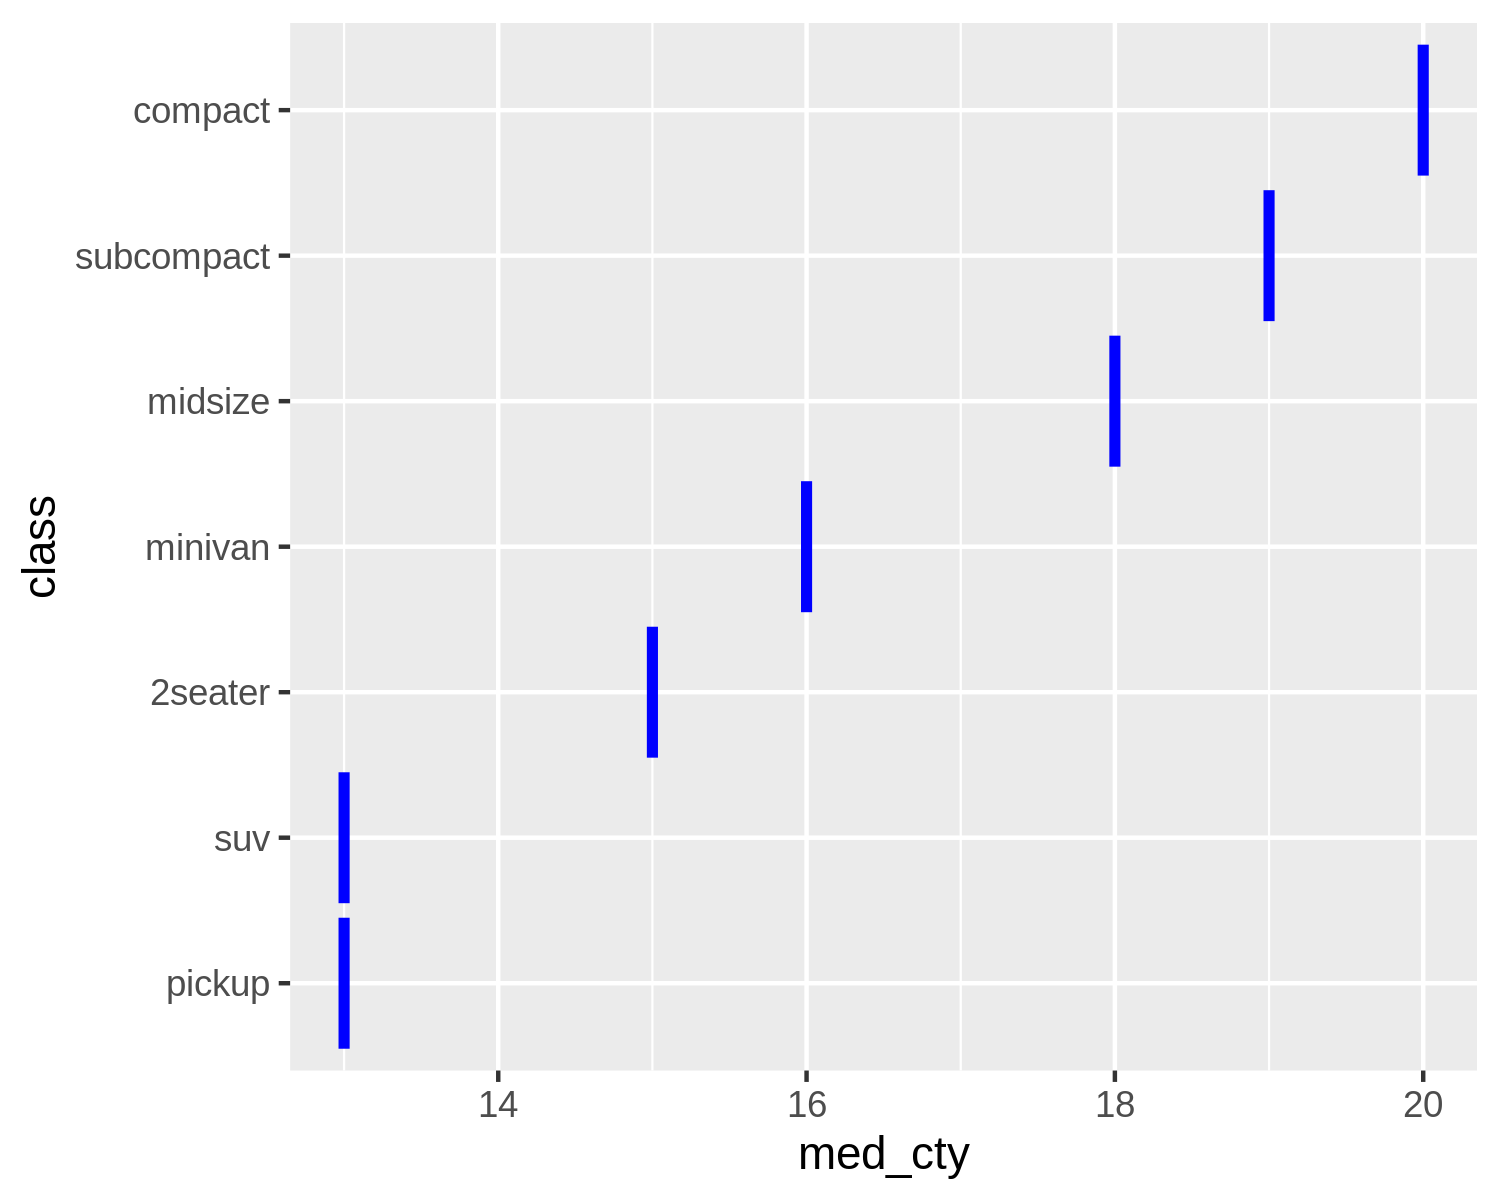

In [3]:
p = ggplot(med_table, aes( x = med_cty, y = class ))

p = p + geom_crossbar(xmin = 1, xmax = 1, color = "blue")

p

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


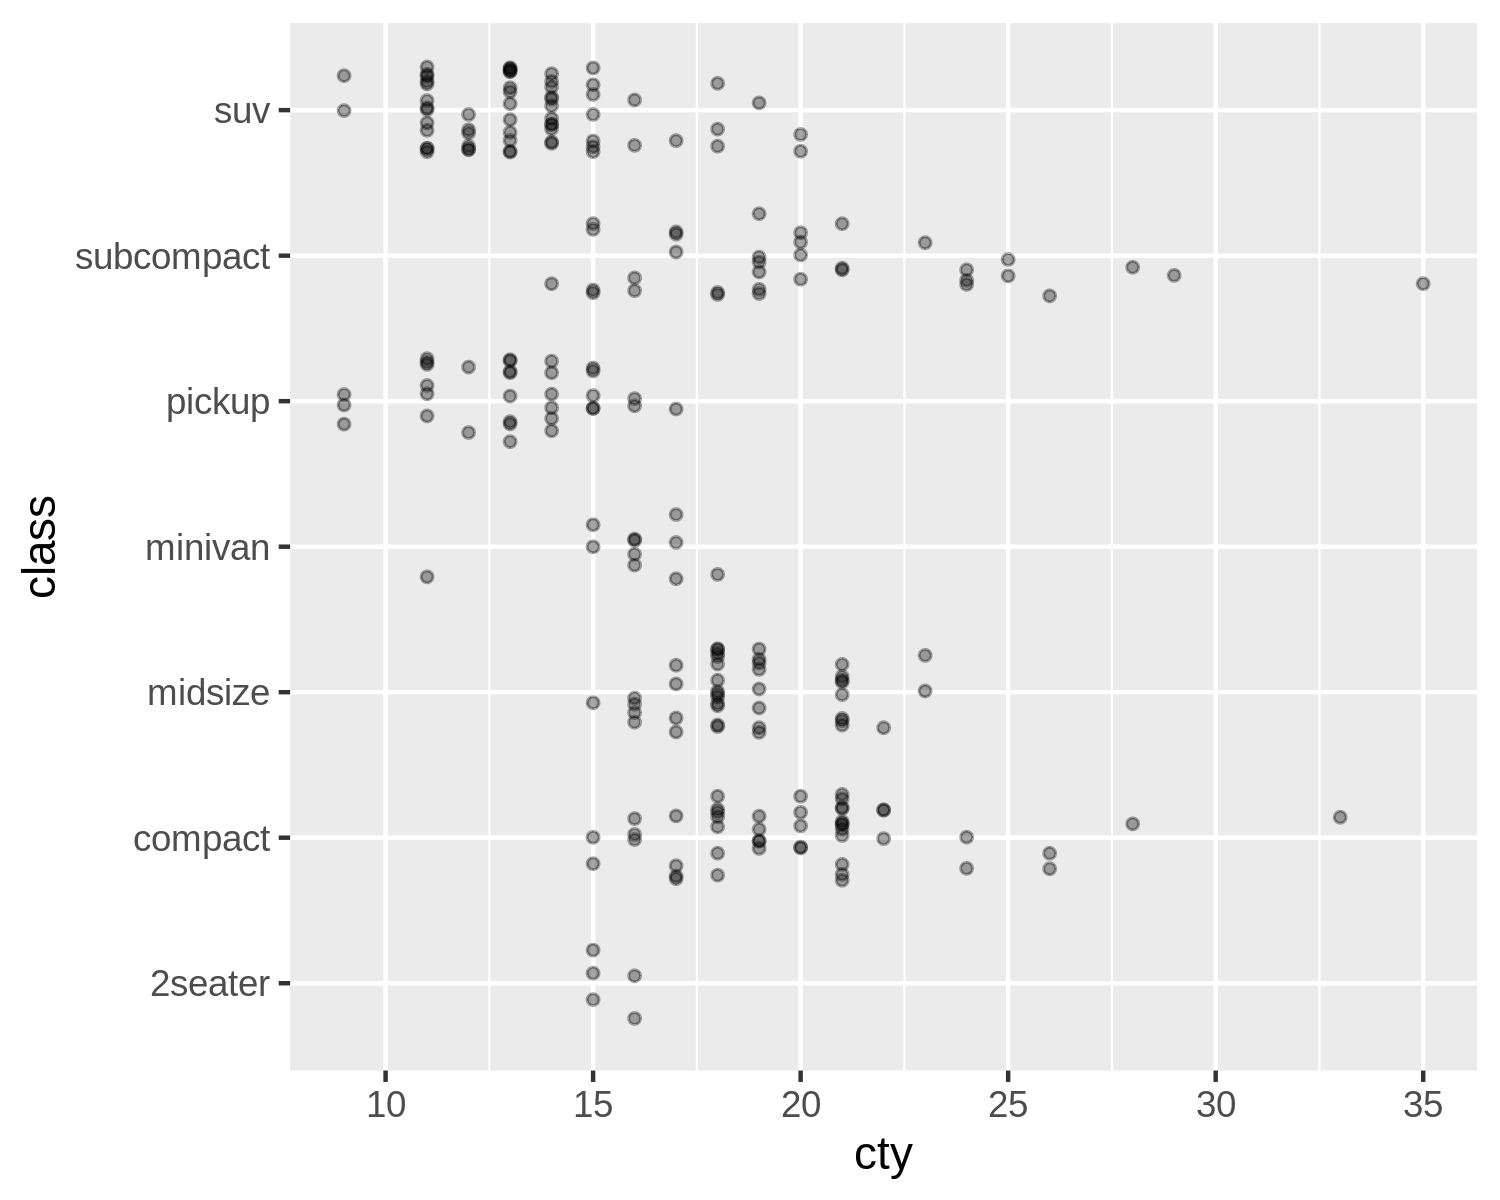

In [5]:
#mpg  %>% head

p = ggplot(mpg, aes(x = cty, y = class))

p = p + geom_jitter(alpha = 0.35, size = 1, width = 0, height = .3)

p 


In [8]:
#This is what we did in lecture 18
med_table = mpg  %>% 
    group_by(class)  %>% 
    summarise(cty = median(cty))  %>% 
    arrange(cty)  %>% 
    mutate(class = fct_inorder(class))  
med_table

class,cty
<fct>,<dbl>
pickup,13
suv,13
2seater,15
minivan,16
midsize,18
subcompact,19
compact,20


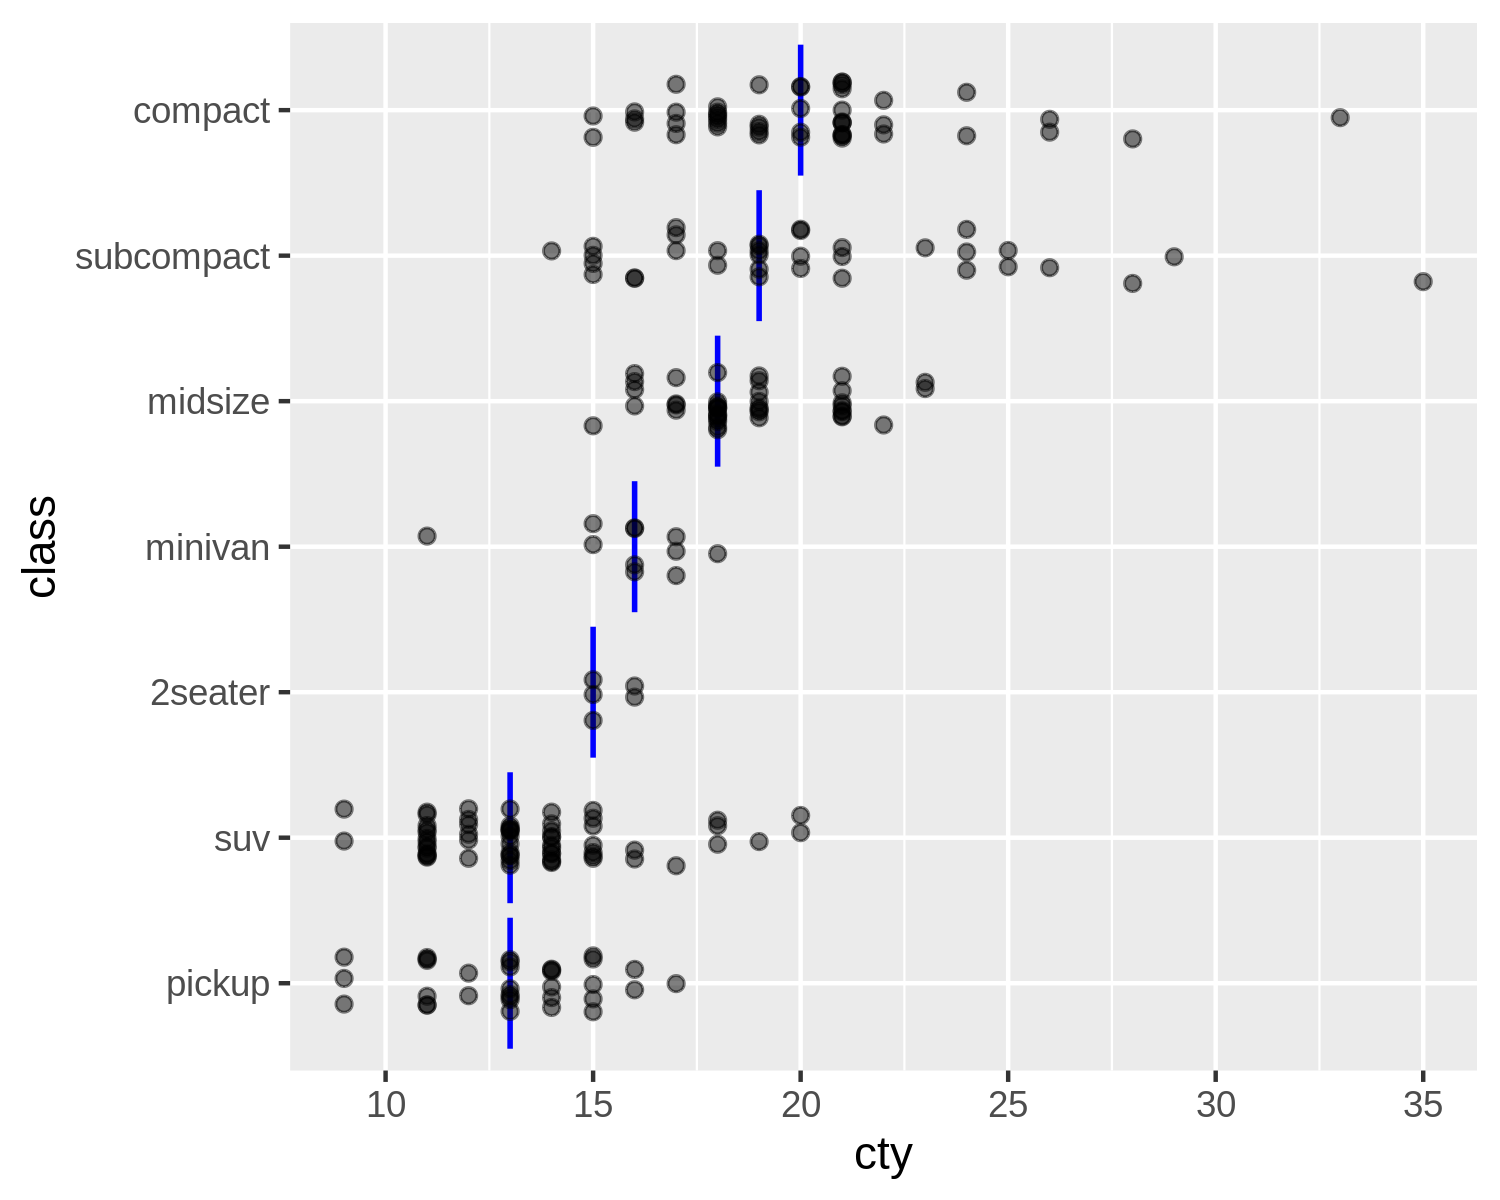

In [20]:
p = ggplot(med_table, aes(x = cty, y = class))

p = p + geom_point(data = mpg, position = position_jitter(h = .2, w = 0), alpha = .5)

p = p + geom_crossbar(xmin = 0, xmax = 0, lwd = .25, color = "blue" )

p

In [ ]:

p = ggplot(df_median, aes(x = cty, y = class))

p = p + geom_point(data = mpg %>% mutate(class = fct_reorder(class, cty, median)), 
                   position = position_jitter(h = 0.2, w = 0), alpha = 0.5)

p = p + geom_crossbar(mapping = aes(xmin = cty, xmax = cty), lwd = 0.25, color = 'blue')

p